In [1]:
import arff
import pandas as pd
%matplotlib inline
import numpy as np

In [3]:
#Loading the arff files-train data,please make sure that your data and the code are in the same file
r = arff.load(open('train.arff', 'rb'))
df_train = pd.DataFrame(r['data'])
df_train.columns = ['Attr1','Attr2','Attr3','Attr4','Attr5','Attr6','Attr7','Attr8','Attr9','Attr10','Attr11','Attr12','Attr13','Attr14','Attr15','Attr16','Attr17','Attr18','Attr19','class']

In [4]:
#Validation data,please make sure that your data and the code are in the same file
r = arff.load(open('validation.arff', 'rb'))
df_validate = pd.DataFrame(r['data'])
df_validate.columns = ['Attr1','Attr2','Attr3','Attr4','Attr5','Attr6','Attr7','Attr8','Attr9','Attr10','Attr11','Attr12','Attr13','Attr14','Attr15','Attr16','Attr17','Attr18','Attr19','class']

In [5]:
#Test data,please make sure that your data and the code are in the same file
r = arff.load(open('test.arff', 'rb'))
df_test = pd.DataFrame(r['data'])
df_test.columns = ['Attr1','Attr2','Attr3','Attr4','Attr5','Attr6','Attr7','Attr8','Attr9','Attr10','Attr11','Attr12','Attr13','Attr14','Attr15','Attr16','Attr17','Attr18','Attr19']

In [7]:
print(df_train.shape)
print(df_validate.shape)
print(df_test.shape)

(1809, 20)
(1385, 20)
(1384, 19)


In [8]:
df_train.describe()

C:\Users\Ashwin\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Attr1,Attr5,Attr6,Attr7,Attr8,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,class
count,1809.000000,1.808000e+03,1809.000000,1808.000000,1809.000000,1809.000000,1806.000000,1808.000000,1809.000000,1809.000000,1809.0,1809.0,1808.0,1809.000000,1807.000000,1809.000000
mean,905.000000,9.085197e+04,539.982863,12.597898,4.778331,0.877833,0.399225,0.403208,0.071310,0.003317,0.0,0.0,0.0,4974.488668,4239.900387,0.061913
std,522.357636,2.285883e+05,556.279554,82.357108,63.589287,1.380971,0.773938,0.783427,0.285917,0.057512,0.0,0.0,0.0,19587.599715,18307.254479,0.241063
min,1.000000,2.900000e+02,3.000000,-96.000000,-96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
25%,453.000000,NaN,189.000000,NaN,-37.000000,0.000000,NaN,NaN,0.000000,0.000000,0.0,0.0,NaN,0.000000,NaN,0.000000
50%,905.000000,NaN,380.000000,NaN,-6.000000,0.000000,NaN,NaN,0.000000,0.000000,0.0,0.0,NaN,0.000000,NaN,0.000000
75%,1357.000000,NaN,678.000000,NaN,31.000000,1.000000,NaN,NaN,0.000000,0.000000,0.0,0.0,NaN,2700.000000,NaN,0.000000
max,1809.000000,2.595650e+06,4365.000000,1245.000000,838.000000,9.000000,5.000000,7.000000,3.000000,1.000000,0.0,0.0,0.0,402000.000000,400000.000000,1.000000


In [9]:
#Dropping attribiutes15,16,17 as they have 0 variance
df_train = df_train.drop(['Attr15','Attr16','Attr17'],axis=1)
df_validate = df_validate.drop(['Attr15','Attr16','Attr17'],axis=1)
df_test = df_test.drop(['Attr15','Attr16','Attr17'],axis=1)

In [10]:
print(df_train.shape)
print(df_validate.shape)
print(df_test.shape)

(1809, 17)
(1385, 17)
(1384, 16)


In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1809 entries, 0 to 1808
Data columns (total 17 columns):
Attr1     1809 non-null float64
Attr2     1809 non-null object
Attr3     1809 non-null object
Attr4     1809 non-null object
Attr5     1808 non-null float64
Attr6     1809 non-null float64
Attr7     1808 non-null float64
Attr8     1809 non-null float64
Attr9     1809 non-null object
Attr10    1809 non-null float64
Attr11    1806 non-null float64
Attr12    1808 non-null float64
Attr13    1809 non-null float64
Attr14    1809 non-null float64
Attr18    1809 non-null float64
Attr19    1807 non-null float64
class     1809 non-null float64
dtypes: float64(13), object(4)
memory usage: 240.3+ KB


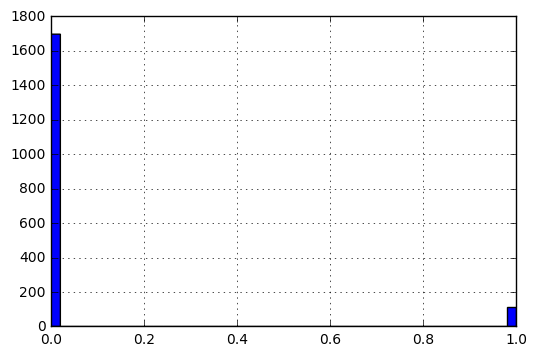

In [12]:
#Understanding the distribution of the target attribute
df_train['class'].hist(bins=50)

In [13]:
#Appending the train data with validation file to reduce the class imbalance
final_train = df_train.append(df_validate)

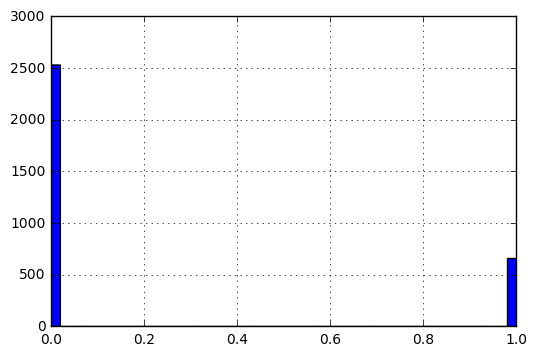

In [14]:
#Checking the distribution of the target
final_train['class'].hist(bins=50)

In [15]:
final_train.shape

(3194, 17)

In [16]:
final_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3194 entries, 0 to 1384
Data columns (total 17 columns):
Attr1     3194 non-null float64
Attr2     3194 non-null object
Attr3     3194 non-null object
Attr4     3194 non-null object
Attr5     3193 non-null float64
Attr6     3194 non-null float64
Attr7     3193 non-null float64
Attr8     3194 non-null float64
Attr9     3194 non-null object
Attr10    3194 non-null float64
Attr11    3191 non-null float64
Attr12    3193 non-null float64
Attr13    3194 non-null float64
Attr14    3194 non-null float64
Attr18    3194 non-null float64
Attr19    3192 non-null float64
class     3194 non-null float64
dtypes: float64(13), object(4)
memory usage: 449.2+ KB


In [17]:
print(final_train['Attr2'].value_counts())
print(final_train['Attr3'].value_counts())
print(final_train['Attr4'].value_counts())

a    2054
b    1140
Name: Attr2, dtype: int64
a    2010
b    1127
c      57
Name: Attr3, dtype: int64
W    2151
N    1043
Name: Attr4, dtype: int64


In [18]:
#Checking correlation between the attributes
final_train.corr(method = 'pearson')

,Attr1,Attr5,Attr6,Attr7,Attr8,Attr10,Attr11,Attr12,Attr13,Attr14,Attr18,Attr19,class
Attr1,1.000000,0.144983,0.183870,0.007765,-0.005605,0.128634,0.125377,0.087751,0.023920,0.004372,0.040735,0.040088,0.403784
Attr5,0.144983,1.000000,0.792397,0.046009,0.083910,0.257222,0.201778,0.214666,0.111334,-0.017165,0.093201,0.082297,0.326226
Attr6,0.183870,0.792397,1.000000,0.248026,0.345942,0.335563,0.264706,0.256640,0.184413,0.033931,0.176404,0.159997,0.416799
Attr7,0.007765,0.046009,0.248026,1.000000,0.802161,0.038720,0.031053,0.014848,0.014147,0.118944,0.077697,0.078177,0.016242
Attr8,-0.005605,0.083910,0.345942,0.802161,1.000000,0.075084,0.042512,0.053302,0.050332,0.165888,0.134578,0.131506,0.014965
Attr10,0.128634,0.257222,0.335563,0.038720,0.075084,1.000000,0.802051,0.799810,0.392527,0.052228,0.369596,0.295191,0.375014
Attr11,0.125377,0.201778,0.264706,0.031053,0.042512,0.802051,1.000000,0.347831,0.181464,-0.018618,0.163097,0.125328,0.332430
Attr12,0.087751,0.214666,0.256640,0.014848,0.053302,0.799810,0.347831,1.000000,0.167702,0.040458,0.249859,0.176117,0.280642
Attr13,0.023920,0.111334,0.184413,0.014147,0.050332,0.392527,0.181464,0.167702,1.000000,-0.016648,0.537156,0.478168,0.104540
Attr14,0.004372,-0.017165,0.033931,0.118944,0.165888,0.052228,-0.018618,0.040458,-0.016648,1.000000,0.710505,0.741114,-0.018849


In [19]:
#Removing attr18 which is highly correlated to attr19
final_train = final_train.drop(['Attr18'],axis=1)
df_test = df_test.drop(['Attr18'],axis=1)

In [20]:
print(final_train.shape)
print(df_test.shape)

(3194, 16)
(1384, 15)


In [21]:
#Checking for NULL values
final_train.apply(lambda x : sum(x.isnull()),axis = 0)
df_test.apply(lambda x :sum(x.isnull()),axis=0)

Attr1     0
Attr2     0
Attr3     0
Attr4     0
Attr5     0
Attr6     0
Attr7     0
Attr8     0
Attr9     0
Attr10    0
Attr11    0
Attr12    0
Attr13    0
Attr14    0
Attr19    0
dtype: int64

In [22]:
final_train = final_train.dropna()

In [30]:
final_train['class'] =final_train['class'].astype(float)

In [31]:
final_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3186 entries, 0 to 1384
Data columns (total 16 columns):
Attr1     3186 non-null float64
Attr2     3186 non-null int64
Attr3     3186 non-null int64
Attr4     3186 non-null int64
Attr5     3186 non-null float64
Attr6     3186 non-null float64
Attr7     3186 non-null float64
Attr8     3186 non-null float64
Attr9     3186 non-null int64
Attr10    3186 non-null float64
Attr11    3186 non-null float64
Attr12    3186 non-null float64
Attr13    3186 non-null float64
Attr14    3186 non-null float64
Attr19    3186 non-null float64
class     3186 non-null float64
dtypes: float64(12), int64(4)
memory usage: 423.1 KB


In [25]:
#Label Encoding to convert categorical attributes to numeric type
from sklearn.preprocessing import LabelEncoder
var_mod = ['Attr2','Attr3','Attr4','Attr9']
le = LabelEncoder()
for i in var_mod:
    final_train[i] = le.fit_transform(final_train[i])

In [26]:
#Label Encoding to convert categorical attributes to numeric type
from sklearn.preprocessing import LabelEncoder
var_mod = ['Attr2','Attr3','Attr4','Attr9']
le = LabelEncoder()
for i in var_mod:
    df_test[i] = le.fit_transform(df_test[i])

In [32]:
final_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3186 entries, 0 to 1384
Data columns (total 16 columns):
Attr1     3186 non-null float64
Attr2     3186 non-null int64
Attr3     3186 non-null int64
Attr4     3186 non-null int64
Attr5     3186 non-null float64
Attr6     3186 non-null float64
Attr7     3186 non-null float64
Attr8     3186 non-null float64
Attr9     3186 non-null int64
Attr10    3186 non-null float64
Attr11    3186 non-null float64
Attr12    3186 non-null float64
Attr13    3186 non-null float64
Attr14    3186 non-null float64
Attr19    3186 non-null float64
class     3186 non-null float64
dtypes: float64(12), int64(4)
memory usage: 423.1 KB


In [33]:
X_train,Y_train = final_train[final_train.columns[0:15]],final_train[final_train.columns[15]]
X_Test = df_test

In [34]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [35]:
Y_test= model.predict(X_Test)

In [53]:
#Saving your results in a CSV file
np.savetxt('output_v02.csv',Y_test,delimiter=',')

In [54]:
#Building logistic regression model
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [55]:
#Prediciting the class of the target variable on test
Y_Test = logistic.predict(X_Test)

In [56]:
##Saving your results in a CSV file
np.savetxt('output_v03.csv',Y_Test,delimiter=',')

In [58]:
#Dropping attribute7 as it is collinear with attr8
final_train = final_train.drop(['Attr7'],axis=1)
df_test = df_test.drop(['Attr7'],axis=1)

In [61]:
final_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3186 entries, 0 to 1384
Data columns (total 15 columns):
Attr1     3186 non-null float64
Attr2     3186 non-null int64
Attr3     3186 non-null int64
Attr4     3186 non-null int64
Attr5     3186 non-null float64
Attr6     3186 non-null float64
Attr8     3186 non-null float64
Attr9     3186 non-null int64
Attr10    3186 non-null float64
Attr11    3186 non-null float64
Attr12    3186 non-null float64
Attr13    3186 non-null float64
Attr14    3186 non-null float64
Attr19    3186 non-null float64
class     3186 non-null float64
dtypes: float64(11), int64(4)
memory usage: 398.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384 entries, 0 to 1383
Data columns (total 14 columns):
Attr1     1384 non-null float64
Attr2     1384 non-null int64
Attr3     1384 non-null int64
Attr4     1384 non-null int64
Attr5     1384 non-null float64
Attr6     1384 non-null float64
Attr8     1384 non-null float64
Attr9     1384 non-null int64
Attr10    138

In [62]:
X_train,Y_train = final_train[final_train.columns[0:14]],final_train[final_train.columns[14]]
X_Test = df_test

In [63]:
#Building logistic regression model
from sklearn.linear_model import LogisticRegression
logistic1 = LogisticRegression()
logistic1.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [64]:
#Predicting the class of the target variable on test
Y_Test = logistic1.predict(X_Test)

In [65]:
##Saving your results in a CSV file
np.savetxt('output_v04.csv',Y_Test,delimiter=',')

In [67]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier(n_estimators=50,class_weight="balanced")
rf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [68]:
Y_Test = rf.predict(X_Test)

In [69]:
#Saving your results in a CSV file
np.savetxt('output_v05.csv',Y_Test,delimiter=',')

In [73]:
#Gives feature importance
print(rf.feature_importances_)

[ 0.29721124  0.01024569  0.01249112  0.01342542  0.21424349  0.12471616
  0.07348063  0.00490488  0.05829276  0.05224282  0.01685681  0.00601549
  0.00031909  0.1155544 ]


In [75]:
#Gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier()
gbm.fit(X_train,Y_train)

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [76]:
Y_Test = gbm.predict(X_Test)

In [77]:
##Saving your results in a CSV file
np.savetxt('output_v06.csv',Y_Test,delimiter=',')